In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Percentage of people leaving their district for work:

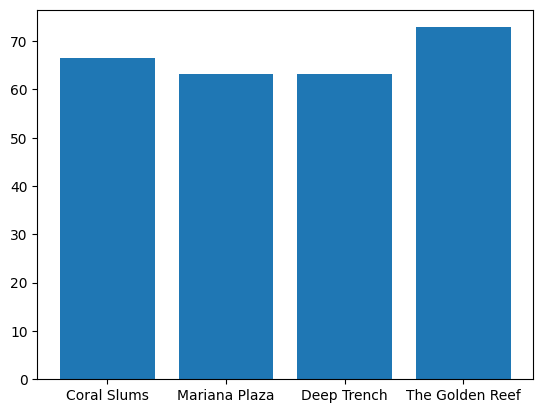

In [22]:
df = pd.read_csv("atlantis_citizens_final.csv");
districts = list()
for dn in df["District_Name"].unique():
    districts.append(df[df["District_Name"]==dn])

out_work = list()
for dn in districts:
    out_work.append((len(dn[dn["District_Name"]!=dn["Work_District"]])) / len(dn) *100.0)

plt.bar(df["District_Name"].unique(),out_work)
plt.show()


Golden Reef has the most amount of people leaving for work

### Percentage of people in each occupation leaving their district for work:

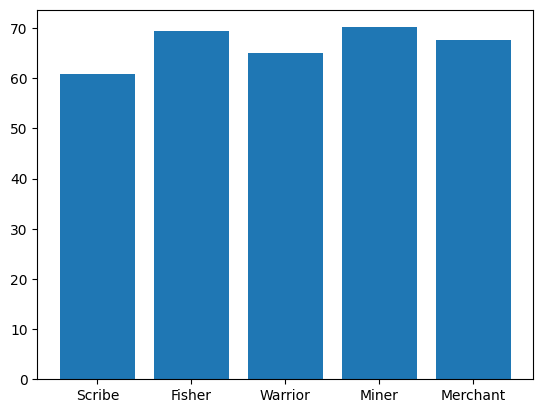

In [5]:
occupations = list()
for dn in df["Occupation"].unique():
    occupations.append(df[df["Occupation"]==dn])

out_occ = list()
for occ in occupations:
    out_occ.append((len(occ[occ["District_Name"]!=occ["Work_District"]])) / len(occ) *100.0)

plt.bar(df["Occupation"].unique(),out_occ)
plt.show()

Not much of a differnce between occupations

### Home district work distribution:

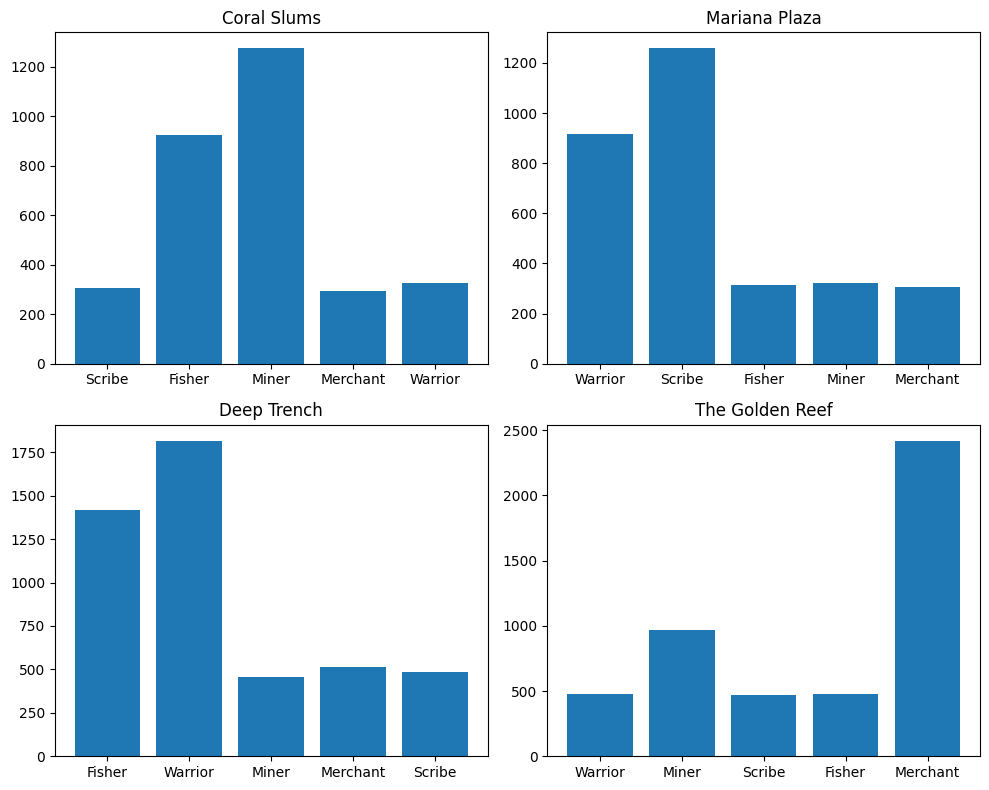

In [6]:
fig,axes=plt.subplots(2,2,figsize=(10,8))
i=0

for district in districts:
    work = district["Occupation"].value_counts(sort=False)

    ax=axes.flat[i]
    ax.bar(work.index,work)
    ax.set_title(district["District_Name"].iloc[0])
    i+=1

plt.tight_layout()
plt.show()

##### Thus people living in:
1. Colar slums are mostly miners and fishers
2. Mariana plaza are mostly Scribes and Warriors
3. Deep Trench are mostly Warriors and fishers
4. Golden Reef are mostly Merchants
> Home district has a significant impact on occupation

### Work district work distribution:

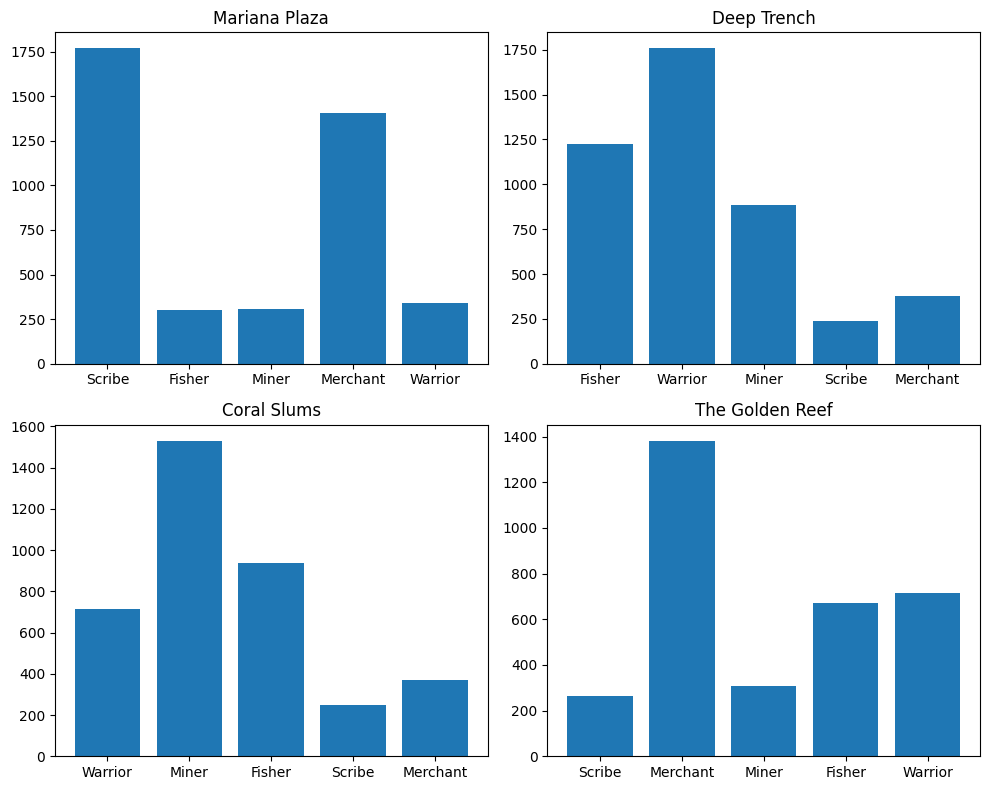

In [7]:
work_districts = list()
for dn in df["Work_District"].unique():
    work_districts.append(df[df["Work_District"]==dn])

fig,axes=plt.subplots(2,2,figsize=(10,8))
i=0

for district in work_districts:
    work = district["Occupation"].value_counts(sort=False)

    ax=axes.flat[i]
    ax.bar(work.index,work)
    ax.set_title(district["Work_District"].iloc[0])
    i+=1

plt.tight_layout()
plt.show()

##### Thus people working in:
1. Colar slums are mostly miners
2. Mariana plaza are mostly Scribes and Merchants
3. Deep Trench are mostly Warriors
4. Golden Reef are mostly Merchants

Work district has a significant impact on occupation
 >Golden reef is characteristic of merchants

### Occupation wise people leaving for work:

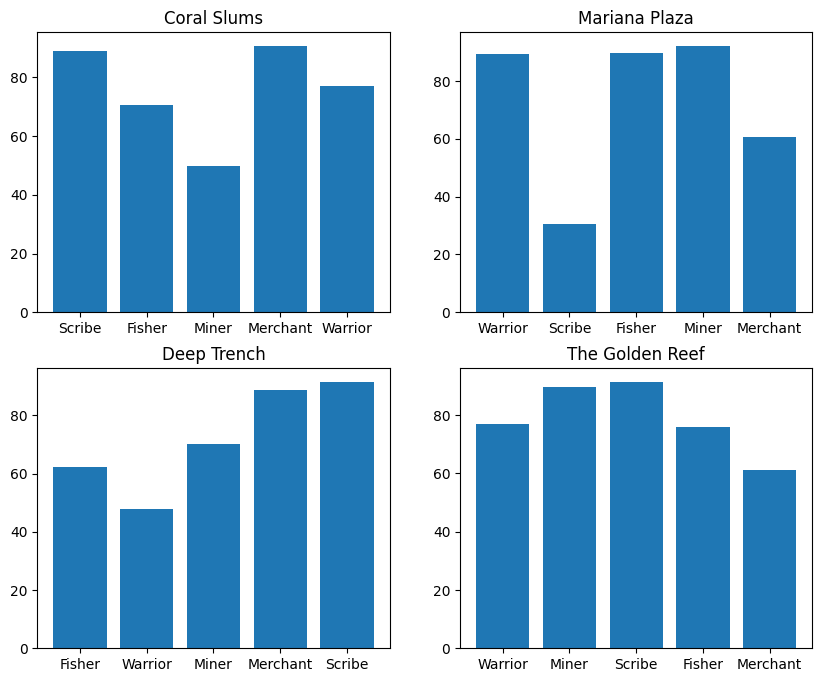

In [8]:
fig,axes=plt.subplots(2,2,figsize=(10,8))
i=0

for d in districts:
    out_for_work=list()
    
    for occ in d["Occupation"].unique():
        out=len(d[(d["Occupation"]==occ) & (d["District_Name"]!=d["Work_District"])])
        total=len(d[(d["Occupation"]==occ)])
        out_for_work.append(out/total*100.0)


    ax=axes.flat[i]
    ax.bar(d["Occupation"].unique(),out_for_work)
    ax.set_title(d["District_Name"].iloc[0])
    i+=1
    
plt.show()

1. Miners tend to stay in Coral Slums
2. Scribes tend to stay in Mariana Plaza
3. Warriors tend to stay in Deep Trench
4. Merchants tend to stay in Golden Reef

### Wealth vs House Size:

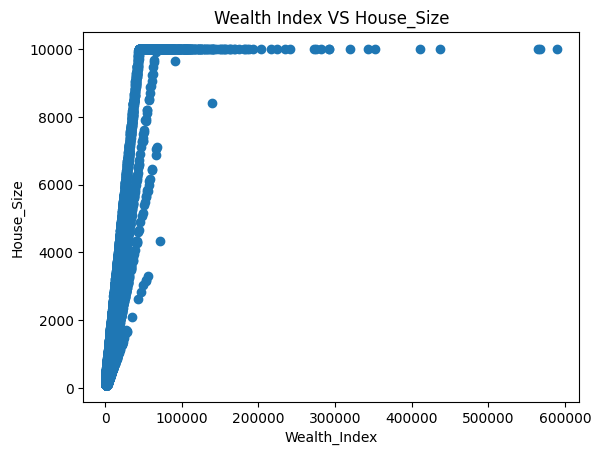

In [9]:
plt.scatter(df["Wealth_Index"],df["House_Size_sq_ft"])
plt.xlabel("Wealth_Index")
plt.ylabel("House_Size")
plt.title("Wealth Index VS House_Size")
plt.show()

They seem to have a linear relationship 

### Avgerage wealth and house size Occupation Wise:

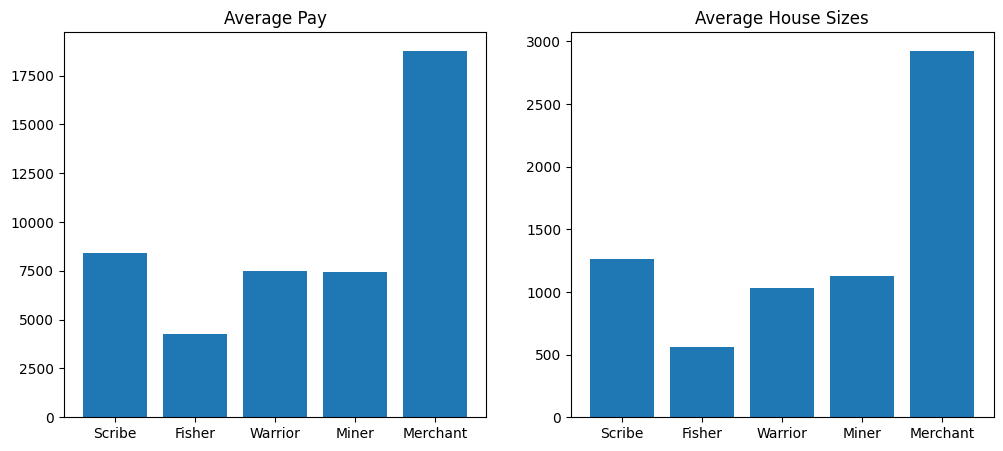

In [10]:
pays=list()
house=list()
 
for occ in df["Occupation"].unique():
    pay=df[(df["Occupation"]==occ)]["Wealth_Index"].mean()
    pays.append(pay)

    hs=df[df["Occupation"]==occ]["House_Size_sq_ft"].mean()
    house.append(hs)

fig,axes=plt.subplots(1,2,figsize=(12,5))
axes[0].bar(df["Occupation"].unique(),pays)
axes[0].set_title("Average Pay")

axes[1].bar(df["Occupation"].unique(),house)
axes[1].set_title("Average House Sizes")
plt.show()

1. Merchants tend to be very rich.
2. Fishers are poor compared to other occupations.

### House Size vs Life Expectancy:

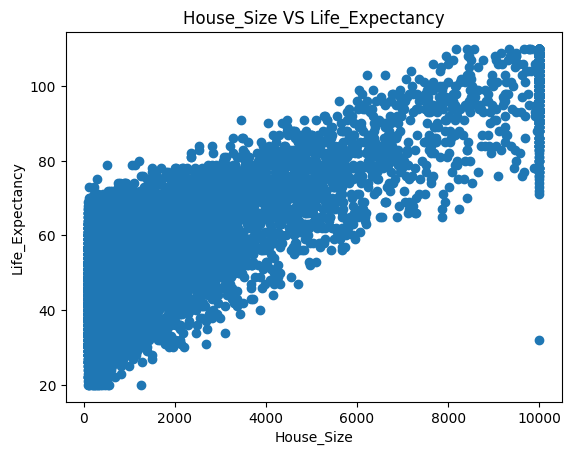

In [20]:
plt.scatter(df["House_Size_sq_ft"],df["Life_Expectancy"])
plt.xlabel("House_Size")
plt.ylabel("Life_Expectancy")
plt.title("House_Size VS Life_Expectancy")
plt.show()

It seems that a living in bigger house increases life expectacy a bit

### Wealth vs Lifespan:

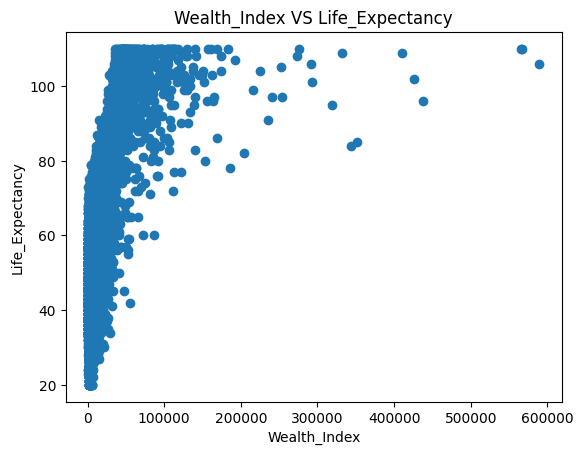

In [23]:
plt.scatter(df["Wealth_Index"],df["Life_Expectancy"])
plt.xlabel("Wealth_Index")
plt.ylabel("Life_Expectancy")
plt.title("Wealth_Index VS Life_Expectancy")
plt.show()

Although not much prominent but being rich offers a better life expectancy to some extent

### Effect of Vehicle owned on occupation:

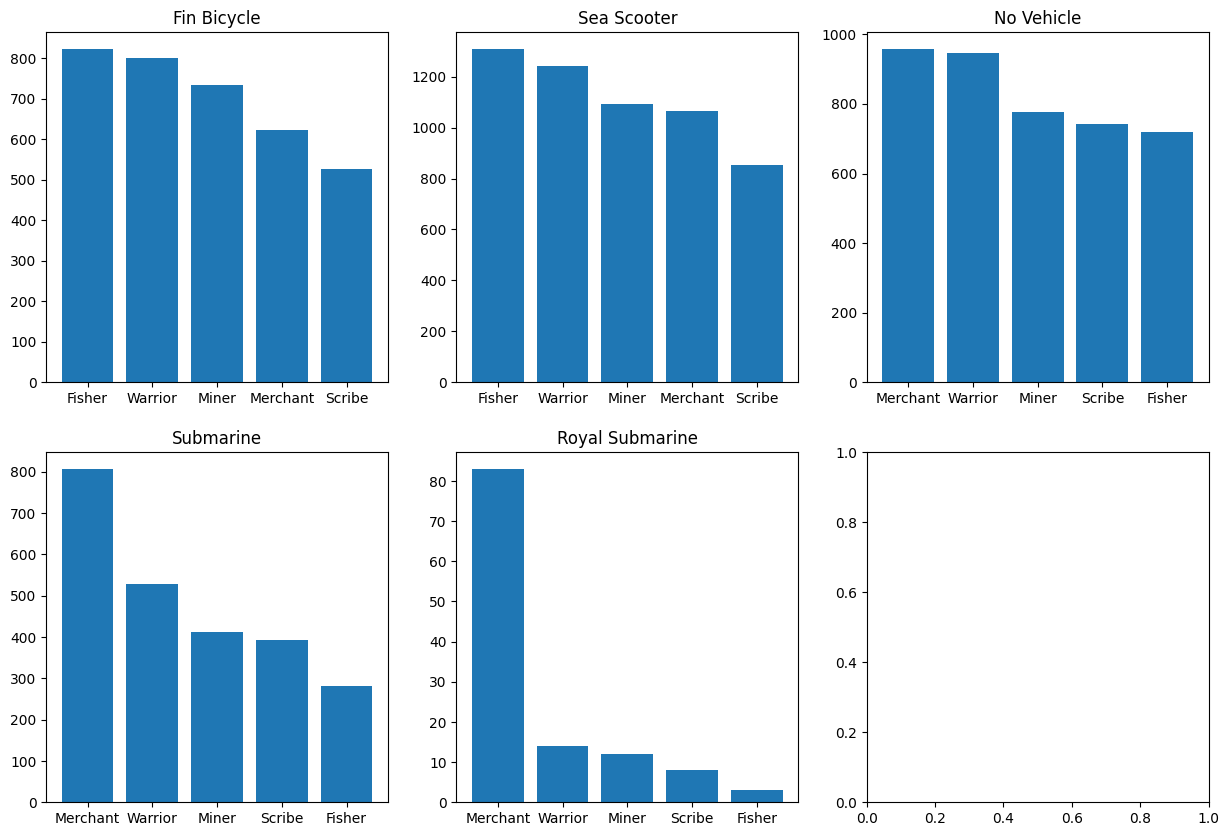

In [12]:
fig,axes = plt.subplots(2,3,figsize=(15,10))
i=0

for vehicle in df["Vehicle_Owned"].unique():
    owner_distribution=df[df["Vehicle_Owned"]==vehicle]["Occupation"].value_counts()

    ax=axes.flat[i]
    ax.bar(owner_distribution.index,owner_distribution)
    ax.set_title(vehicle)
    i+=1

plt.show()

Thus if a person owns a submarine (especially a Royal Submarine) be is likely to be a merchant

### Effect of Diet on Occupation:

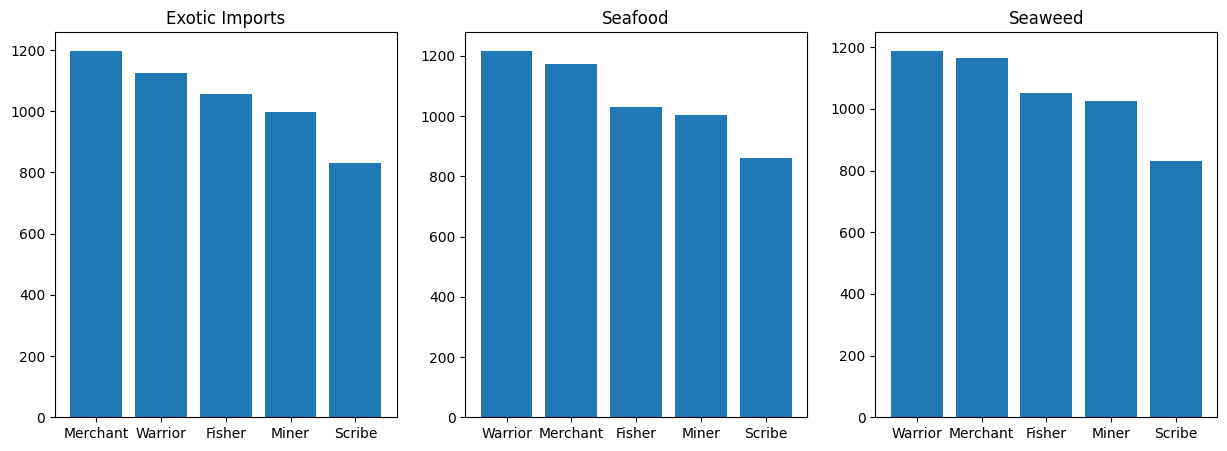

In [13]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
i=0
for food in df["Diet_Type"].unique():
    diet=df[df["Diet_Type"]==food]["Occupation"].value_counts()

    ax=axes.flat[i]
    ax.bar(diet.index,diet)
    ax.set_title(food)
    i+=1

plt.show()

It seems that all types of food are eaten almost equally by all types of occupation so it doesn't help much in prediction

### Effect of wealth on food:

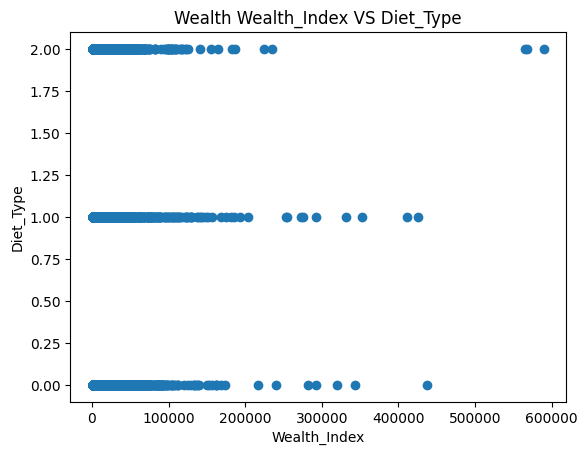

Food | Average wealth of people eating this food
Seafood | 9966.829104932007
Seaweed | 8261.32409294741
Exotic Imports | 10366.43532798684


In [15]:
plt.scatter(df["Wealth_Index"],df["Diet_Type"].map({"Exotic Imports":0,"Seafood":1,"Seaweed":2}))
plt.xlabel("Wealth_Index")
plt.ylabel("Diet_Type")
plt.title("Wealth Wealth_Index VS Diet_Type")
plt.show()

print("Food","|","Average wealth of people eating this food")
print("Seafood","|",df[df["Diet_Type"]=="Seafood"]["Wealth_Index"].mean())
print("Seaweed","|",df[df["Diet_Type"]=="Seaweed"]["Wealth_Index"].mean())
print("Exotic Imports","|",df[df["Diet_Type"]=="Exotic Imports"]["Wealth_Index"].mean())

Financial income does not seem to effect Diet Type

### Effect of Occupation on Life Expectancy:

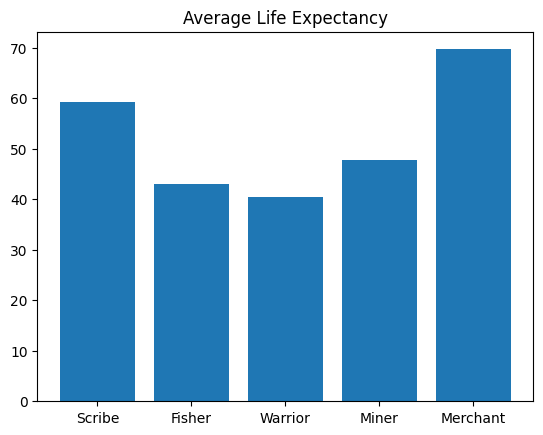

In [ ]:
life=list()

for occ in df["Occupation"].unique():
    life.append(df[df["Occupation"]==occ]["Life_Expectancy"].mean())

plt.bar(df["Occupation"].unique(),life)
plt.title("Average Life Expectancy")
plt.show()

1. Merchants seem to live longest
2. Scribe live longer and Warriors live shorter which can help to distinguise between Scribe,Fisher,Warriors and Miners